## Clustering

Clustering or cluster analysis is a machine learning technique, which groups the unlabelled dataset. It can be defined as "A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group."

It does it by finding some similar patterns in the unlabelled dataset such as shape, size, color, behavior, etc., and divides them as per the presence and absence of those similar patterns.

It is an unsupervised learning method, hence no supervision is provided to the algorithm, and it deals with the unlabeled dataset.

After applying this clustering technique, each cluster or group is provided with a cluster-ID. ML system can use this id to simplify the processing of large and complex datasets.

The clustering technique is commonly used for statistical data analysis.


**Application**

- Targetting similiar pepole or objects
  - student tutorial groups
  - hobby groups
  - health support groups
  - customer group for marketing
  - organizing email
- Spatial clustering
  - Exam centers
  - Location for a business chain
  - planning a political strategy
  
The clustering technique can be widely used in various tasks. Some most common uses of this technique are:

- Market Segmentation
- Statistical data analysis
- Social network analysis
- Image segmentation
- Anomaly detection, etc.

Apart from these general usages, it is used by the Amazon in its recommendation system to provide the recommendations as per the past search of products. Netflix also uses this technique to recommend the movies and web-series to its users as per the watch history.

### K-Means
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

**The working of the K-Means algorithm is explained in the below steps:**

Step-1: Select the number K to decide the number of clusters.

Step-2: Select random K points or centroids. (It can be other from the input dataset).

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

Step-4: Calculate the variance and place a new centroid of each cluster.

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

Step-7: The model is ready.

#### Elbow method to choose the value of K
The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2

∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms.

To find the optimal value of clusters, the elbow method follows the below steps:

- It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).
- For each value of K, calculates the WCSS value.
- Plots a curve between calculated WCSS values and the number of clusters K.
- The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

## Implementation

In [38]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [39]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


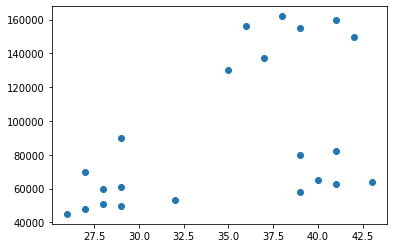

In [40]:
plt.scatter(df.Age,df['Income($)'])

In [41]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [42]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [43]:
df['cluster'] = y_pred
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

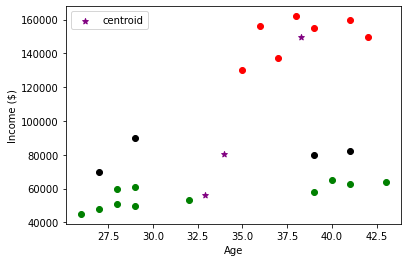

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [45]:
# the above is not made correct
# so we use min max scaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [46]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [47]:
df['cluster']=y_predicted
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


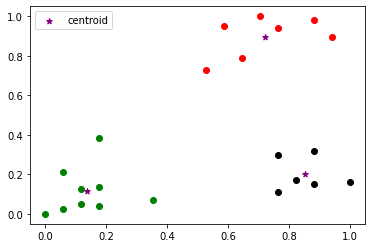

In [48]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

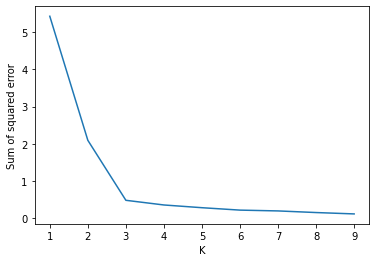

In [49]:
## Elbow plot for perfect value of number of cluster

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**Hierarchical Clustering**

Hierarchical clustering can be used as an alternative for the partitioned clustering as there is no requirement of pre-specifying the number of clusters to be created. In this technique, the dataset is divided into clusters to create a tree-like structure, which is also called a dendrogram. The observations or any number of clusters can be selected by cutting the tree at the correct level. The most common example of this method is the Agglomerative Hierarchical algorithm.

DENDOGRAM

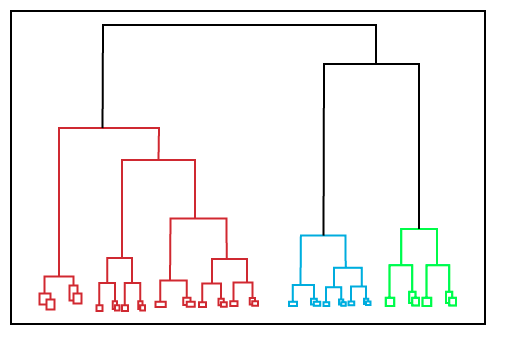

Single link algorithm

https://www.analyticsvidhya.com/blog/2021/06/single-link-hierarchical-clustering-clearly-explained/

**Density based Clustering**

Density-Based Clustering refers to one of the most popular unsupervised learning methodologies used in model building and machine learning algorithms. The data points in the region separated by two clusters of low point density are considered as noise. The surroundings with a radius ε of a given object are known as the ε neighborhood of the object. If the ε neighborhood of the object comprises at least a minimum number, MinPts of objects, then it is called a core object.

https://www.javatpoint.com/density-based-clustering-in-data-mining